In [406]:
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Load the CSV files into DataFrames
df_normal = pd.read_csv('ptbdb_normal.csv', header=None)
df_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)

# Get the dimensions of each DataFrame
rows_normal, columns_normal = df_normal.shape
rows_abnormal, columns_abnormal = df_abnormal.shape

print("Dimensions of 'ptbdb_normal.csv' dataset: {} rows x {} columns".format(rows_normal, columns_normal))
print("Dimensions of 'ptbdb_abnormal.csv' dataset: {} rows x {} columns".format(rows_abnormal, columns_abnormal))


Dimensions of 'ptbdb_normal.csv' dataset: 4046 rows x 188 columns
Dimensions of 'ptbdb_abnormal.csv' dataset: 10506 rows x 188 columns


In [407]:
print(df_normal.head)
print(df_abnormal.head)

<bound method NDFrame.head of            0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9 

In [408]:
import matplotlib.pyplot as plt

# Assuming time interval is constant (for example, 1 millisecond)
time_interval = 1  # Time interval in milliseconds

# Create time axis
time_axis = range(len(df_normal.iloc[0]))  # Assuming each value corresponds to a time step
time_axis = [t * time_interval for t in time_axis]

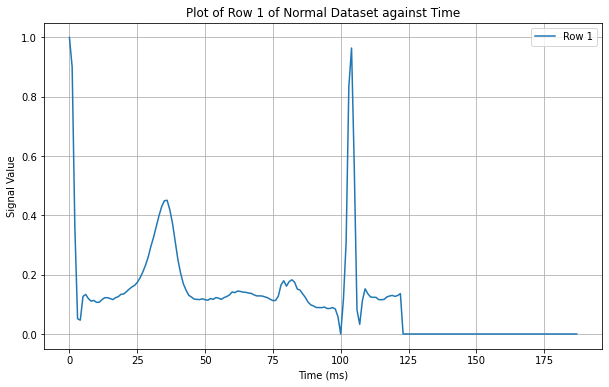

In [409]:
# Plot row 1 of the normal dataset against time
plt.figure(figsize=(10, 6))
plt.plot(time_axis, df_normal.iloc[0], label='Row 1')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Value')
plt.title('Plot of Row 1 of Normal Dataset against Time')
plt.legend()
plt.grid(True)
plt.show()

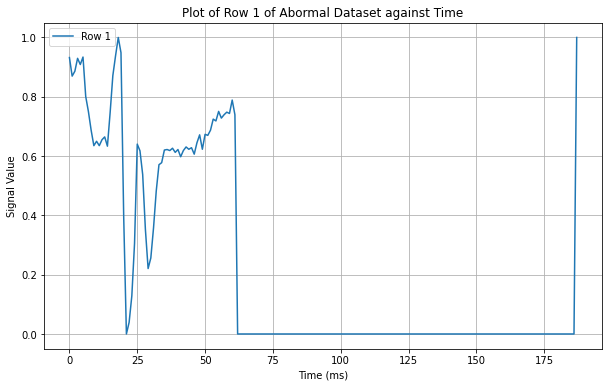

In [441]:
# Plot row 1 of the abnormal dataset against time
plt.figure(figsize=(10, 6))
plt.plot(time_axis, df_abnormal.iloc[0], label='Row 1')
plt.xlabel('Time (ms)')
plt.ylabel('Signal Value')
plt.title('Plot of Row 1 of Abormal Dataset against Time')
plt.legend()
plt.grid(True)
plt.show()

In [411]:
# Checking if last 2 column value is 01 for all rows in the abnormal and 00 in normal

# ptbdb_abnormal.csv
abnormal_187_column=df_abnormal.iloc[:,-1]
abnormal_186_column=df_abnormal.iloc[:,-2]
a2=abnormal_187_column.mean()
a1=abnormal_186_column.mean()
print(a1,a2)

# ptbdb_normal.csv
normal_187_column=df_normal.iloc[:,-1]
normal_186_column=df_normal.iloc[:,-2]
a2=normal_187_column.mean()
a1=normal_186_column.mean()
print(a1,a2)

0.0 1.0
0.0 0.0


In [412]:
# Find the locations and values of elements less than 0 or greater than 1
out_of_range_values = df_abnormal[(df_abnormal < 0) | (df_abnormal > 1)]

# Print the locations and values
print("Locations and values of elements less than 0 or greater than 1:")
for col in out_of_range_values.columns:
    for index, value in out_of_range_values[col].items():
        if not pd.isnull(value):  # Skip NaN values
            print(f"Row: {index}, Column: {col}, Value: {value}")


Locations and values of elements less than 0 or greater than 1:


In [413]:
# Find the locations and values of elements less than 0 or greater than 1
out_of_range_values = df_normal[(df_normal < 0) | (df_normal > 1)]

# Print the locations and values
print("Locations and values of elements less than 0 or greater than 1:")
for col in out_of_range_values.columns:
    for index, value in out_of_range_values[col].items():
        if not pd.isnull(value):  # Skip NaN values
            print(f"Row: {index}, Column: {col}, Value: {value}")


Locations and values of elements less than 0 or greater than 1:


In [414]:
# Concatenate the DataFrames vertically
combined_df = pd.concat([df_normal, df_abnormal], ignore_index=True)

In [415]:
print(combined_df.shape)

(14552, 188)


In [416]:
# Shuffle the DataFrames 
df = combined_df.sample(frac = 1, random_state=1, ignore_index=True)

In [417]:
#check last column
last_column=df.iloc[:,187]
print(last_column)
tmp=last_column.mean()
print(tmp)

needed_m=10506/14552
print(needed_m)

print(df.shape)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14547    0.0
14548    1.0
14549    1.0
14550    0.0
14551    1.0
Name: 187, Length: 14552, dtype: float64
0.7219626168224299
0.7219626168224299
(14552, 188)


In [418]:
#Split the data into features X and target Y

x=df.iloc[:,0:187]
print(x.shape)

(14552, 187)


In [419]:
Y=df.iloc[:,-1]
print(Y.shape)
temp=Y.mean()
print(temp)

(14552,)
0.7219626168224299


In [420]:
a=x.iloc[:,-2]
print(a.shape)
a=a.mean()
print(a)

X = x.drop(x.columns[-1], axis=1).reset_index(drop=True)
print(X.shape)

(14552,)
0.0001853989888291853
(14552, 186)


In [421]:
a=X.iloc[:,-1]
print(a.shape)
a=a.mean()
print(a)

(14552,)
0.0001853989888291853


#
train test Slpit


In [422]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20, random_state=1)

In [423]:
print(X_train.shape)

(11641, 186)


In [424]:
print(Y_train.shape)

(11641,)


In [425]:
print(X_test.shape)

(2911, 186)


In [426]:
print(Y_test.shape)

(2911,)


#Applying Different MODELS#

In [427]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(Y_test, Y_pred)
print("Accuracy (Naive Bayes):", accuracy_nb)

report_nb = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report_nb)

Accuracy (Naive Bayes): 0.6276193747852972
Classification Report:
               precision    recall  f1-score   support

         0.0       0.42      0.81      0.55       825
         1.0       0.88      0.55      0.68      2086

    accuracy                           0.63      2911
   macro avg       0.65      0.68      0.62      2911
weighted avg       0.75      0.63      0.64      2911



In [428]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the classifier on the training data
logreg_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred = logreg_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_lr = accuracy_score(Y_test, Y_pred)
print("Accuracy (Logistic Regression):", accuracy_lr)

report_lr = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report_lr)

Accuracy (Logistic Regression): 0.8186190312607351
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.58      0.65       825
         1.0       0.85      0.91      0.88      2086

    accuracy                           0.82      2911
   macro avg       0.79      0.75      0.76      2911
weighted avg       0.81      0.82      0.81      2911



In [429]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy (SVM Linear):", accuracy_svm)

# Generate a classification report
report_svm = classification_report(Y_test, Y_pred_svm)
print("Classification Report:\n", report_svm)


Accuracy (SVM Linear): 0.825833047062865
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.60      0.66       825
         1.0       0.85      0.92      0.88      2086

    accuracy                           0.83      2911
   macro avg       0.80      0.76      0.77      2911
weighted avg       0.82      0.83      0.82      2911



In [430]:

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy (SVM RBF):", accuracy_svm)

# Generate a classification report
report_svm = classification_report(Y_test, Y_pred_svm)
print("Classification Report:\n", report_svm)


Accuracy (SVM RBF): 0.9103400893163861
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       825
         1.0       0.93      0.95      0.94      2086

    accuracy                           0.91      2911
   macro avg       0.90      0.88      0.89      2911
weighted avg       0.91      0.91      0.91      2911



In [431]:
# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='poly')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy (SVM Poly):", accuracy_svm)

# Generate a classification report
report_svm = classification_report(Y_test, Y_pred_svm)
print("Classification Report:\n", report_svm)


Accuracy (SVM Poly): 0.9027825489522501
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       825
         1.0       0.91      0.95      0.93      2086

    accuracy                           0.90      2911
   macro avg       0.89      0.86      0.88      2911
weighted avg       0.90      0.90      0.90      2911



In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
tree_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_tree = tree_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
print("Accuracy (Decision tree):", accuracy_tree)

# Generate a classification report
report_tree = classification_report(Y_test, Y_pred_tree)
print("Classification Report:\n", report_tree)


Accuracy (Decision tree): 0.923394022672621
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       825
         1.0       0.95      0.94      0.95      2086

    accuracy                           0.92      2911
   macro avg       0.90      0.91      0.91      2911
weighted avg       0.92      0.92      0.92      2911



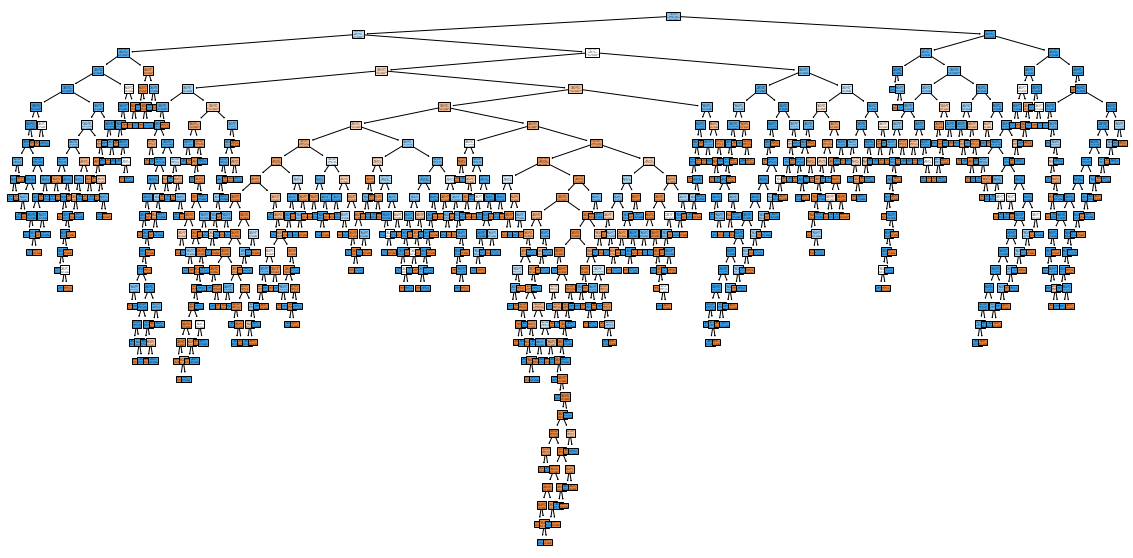

In [434]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True,  class_names=['Normal', 'Abnormal'])
plt.show()


In [435]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Generate a classification report
report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report:\n", report_rf)


Accuracy (Random Forest): 0.9732050841635177
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       825
         1.0       0.97      0.99      0.98      2086

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.97      2911
weighted avg       0.97      0.97      0.97      2911



In [436]:
from sklearn.linear_model import Perceptron


# Initialize the Perceptron classifier
perceptron_classifier = Perceptron()

# Train the classifier on the training data
perceptron_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred_perceptron = perceptron_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_perceptron = accuracy_score(Y_test, Y_pred_perceptron)
print("Accuracy (Perceptron):", accuracy_perceptron)

# Generate a classification report
report_perceptron = classification_report(Y_test, Y_pred_perceptron)
print("Classification Report:\n", report_perceptron)


Accuracy (Perceptron): 0.7454482995534181
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.84      0.65       825
         1.0       0.92      0.71      0.80      2086

    accuracy                           0.75      2911
   macro avg       0.72      0.77      0.73      2911
weighted avg       0.81      0.75      0.76      2911



In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

# Define the parameter grid to search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Regularization strength
    'max_iter': [1000, 2000, 3000, 4000, 5000],  # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'eta0': [0.1, 0.01, 0.001]  # Learning rate
}

# Initialize the Perceptron classifier
perceptron_classifier = Perceptron()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(perceptron_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Best Accuracy: 0.7464096060577893


Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6915 - loss: 0.5418 - val_accuracy: 0.8495 - val_loss: 0.3249
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8696 - loss: 0.2962 - val_accuracy: 0.8932 - val_loss: 0.2494
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9097 - loss: 0.2221 - val_accuracy: 0.9055 - val_loss: 0.2155
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9324 - loss: 0.1770 - val_accuracy: 0.9107 - val_loss: 0.2166
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9398 - loss: 0.1623 - val_accuracy: 0.9354 - val_loss: 0.1633
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9497 - loss: 0.1296 - val_accuracy: 0.9292 - val_loss: 0.1827
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9557 - loss: 0.1159 - val_accuracy: 0.9419 - val_loss: 0.1474
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9572 - loss: 0.1078 - val_accuracy: 0.

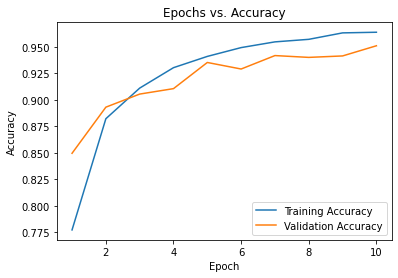

In [447]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_scaled, Y_test))

# Extract accuracy values from the training history
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# Plot epochs vs. accuracy
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')
plt.title('Epochs vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7720 - loss: 0.4489 - val_accuracy: 0.8784 - val_loss: 0.3002
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8934 - loss: 0.2660 - val_accuracy: 0.9151 - val_loss: 0.2269
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9263 - loss: 0.2019 - val_accuracy: 0.9275 - val_loss: 0.1847
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9429 - loss: 0.1561 - val_accuracy: 0.9457 - val_loss: 0.1518
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9570 - loss: 0.1253 - val_accuracy: 0.9502 - val_loss: 0.1336
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9641 - loss: 0.1062 - val_accuracy: 0.9543 - val_loss: 0.1223
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9746 - loss: 0.0850 - val_accuracy: 0.9557 - val_loss: 0.1121
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9755 - loss: 0.0769 - val_accuracy: 0.

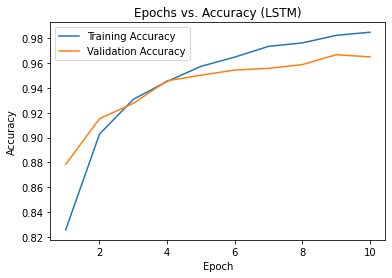

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9649 - loss: 0.0925
Test Loss: 0.09528716653585434
Test Accuracy (LSTM): 0.964960515499115
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [448]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to be compatible with LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_reshaped, Y_test))

# Extract accuracy values from the training history
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# Plot epochs vs. accuracy
plt.plot(range(1, 
               len(accuracy_values) + 1), accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')
plt.title('Epochs vs. Accuracy (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test)
print("Test Loss:", loss)
print("Test Accuracy (LSTM):", accuracy)

# Make predictions
Y_pred_rnn = (model.predict(X_test_reshaped) > 0.5).astype("int32")


Epoch 1/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7784 - loss: 0.4389 - val_accuracy: 0.8282 - val_loss: 0.3591
Epoch 2/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8814 - loss: 0.3160 - val_accuracy: 0.8904 - val_loss: 0.2811
Epoch 3/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9223 - loss: 0.2583 - val_accuracy: 0.9450 - val_loss: 0.2308
Epoch 4/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9460 - loss: 0.2101 - val_accuracy: 0.9330 - val_loss: 0.2082
Epoch 5/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9543 - loss: 0.1809 - val_accuracy: 0.9591 - val_loss: 0.1623
Epoch 6/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9655 - loss: 0.1529 - val_accuracy: 0.9591 - val_loss: 0.1442
Epoch 7/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9703 - loss: 0.1288 - val_accuracy: 0.9670 - val_loss: 0.1221
Epoch 8/8
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9733 - loss: 0.1118 - val_accuracy: 0.

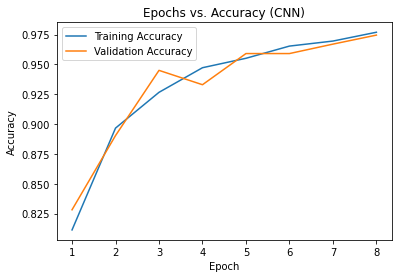

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9755 - loss: 0.1009
Test Loss: 0.10227298736572266
Test Accuracy (CNN): 0.9745791554450989
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [449]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to be compatible with CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_reshaped, Y_train, epochs=8, batch_size=32, verbose=1, validation_data=(X_test_reshaped, Y_test))

# Extract accuracy values from the training history
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# Plot epochs vs. accuracy
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')
plt.title('Epochs vs. Accuracy (CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_reshaped, Y_test)
print("Test Loss:", loss)
print("Test Accuracy (CNN):", accuracy)

# Make predictions
Y_pred_cnn = (model.predict(X_test_reshaped) > 0.5).astype("int32")


In [453]:
!pip install nbconvert

In [456]:
!pip install pandoc

  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33282 sha256=8409aab20bf59b50272885fd0489781be65133cd69a7ddcb1a7791588d4b2a0e
  Stored in directory: c:\users\nandi\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
